### This code computes the pearson's correlation for Immunity and cell stress processes in samples exposed to cosmic radiations in-flights, post-flight and a combination of both. Bonferroni corrections were applied to identify false positives.

In [5]:
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('All_strain.xlsx')
df

,Organ,Radio_Sensitivity,mGy_Absorbed,ISS_Days,Return_Days,Sex,Strain,Age,Mission,MT_Central_Dogma,...,mtDNA_Activated,mtdsRNA_Activated,ISR,UPR,Induced_Senescence,Inhibited_Senescence,Necroptosis,Apoptosis,Pyroptosis,Extracellular_Matrix
0,Spleen,1,8.9700,39.00,1,M,C57BL/6,8.0,MHU-1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.875506
1,Thymus,1,3.1500,13.00,1,F,C57BL/6,8.0,STS-118,-2.000000,...,-1.346757,-1.458871,-1.663817,-2.093026,-1.927908,-1.923250,-1.265627,-1.365548,-1.511577,-1.554172
2,Thymus,1,8.9700,39.00,1,M,C57BL/6,8.0,MHU-1,-1.000000,...,0.000000,1.818500,0.000000,0.000000,0.000000,-1.784773,0.000000,0.000000,0.000000,2.251925
3,Muscle,4,5.0875,22.50,0,M,C57BL/6,9.0,RR-4,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Liver,3,4.6600,12.76,1,F,C57BL/6,9.0,STS-135,0.000000,...,0.000000,-1.542452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.236438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,Skin,2,21.9530,75.00,0,F,C57BL/6,11.0,RR-7,-1.951596,...,0.000000,1.723189,0.000000,0.000000,0.000000,-1.962828,0.000000,0.000000,0.000000,1.706154
532,Muscle,4,30.0700,29.85,1,M,C57BL/6,19.5,BION-M1,-3.000000,...,1.797901,0.000000,0.000000,-1.714215,0.000000,0.000000,1.444190,0.000000,0.000000,0.000000
533,Muscle,4,30.0700,29.85,1,M,C57BL/6,19.5,BION-M1,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.323836,0.000000,0.000000,0.000000,-1.423649
534,Muscle,4,30.0700,29.85,1,M,C57BL/6,19.5,BION-M1,-2.000000,...,0.000000,0.000000,0.000000,-1.577384,1.325273,1.540694,0.000000,0.000000,0.000000,-1.475530


### Inflight vs Post-flight

In [7]:
# In-flight
di = df[df['Return_Days'] < 1]
di

,Organ,Radio_Sensitivity,mGy_Absorbed,ISS_Days,Return_Days,Sex,Strain,Age,Mission,MT_Central_Dogma,...,mtDNA_Activated,mtdsRNA_Activated,ISR,UPR,Induced_Senescence,Inhibited_Senescence,Necroptosis,Apoptosis,Pyroptosis,Extracellular_Matrix
3,Muscle,4,5.0875,22.5,0,M,C57BL/6,9.0,RR-4,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
14,Liver,3,6.4700,22.5,0,F,BALB/c,11.0,RRRM-1/RR-8,0.000000,...,0.0,0.000000,0.0,0.0,1.285257,1.276874,0.0,0.0,0.00000,0.000000
15,Kidney,3,6.4625,25.0,0,F,C3H/HeJ,11.0,RR-7,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
16,Kidney,3,6.4625,25.0,0,F,C57BL/6,11.0,RR-7,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
17,Kidney,3,19.3875,75.0,0,F,C3H/HeJ,11.0,RR-7,-2.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,2.270018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Heart,3,17.8450,55.0,0,F,C57BL/6,29.0,RRRM-2/RR-17,-2.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
528,Kidney,3,19.3875,75.0,0,F,C3H/HeJ,11.0,RR-7,-2.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,2.270018
529,Kidney,3,19.3875,75.0,0,F,C57BL/6,11.0,RR-7,-3.000000,...,0.0,1.535754,0.0,0.0,1.366998,0.000000,0.0,0.0,1.44469,2.150134
530,Skin,2,21.9528,75.0,0,F,C3H/HeJ,11.0,RR-7,-1.869951,...,0.0,0.000000,0.0,0.0,0.000000,-1.664703,0.0,0.0,0.00000,1.573872


In [8]:
# Post-flight
dp = df[df['Return_Days'] > 0]
dp

,Organ,Radio_Sensitivity,mGy_Absorbed,ISS_Days,Return_Days,Sex,Strain,Age,Mission,MT_Central_Dogma,...,mtDNA_Activated,mtdsRNA_Activated,ISR,UPR,Induced_Senescence,Inhibited_Senescence,Necroptosis,Apoptosis,Pyroptosis,Extracellular_Matrix
0,Spleen,1,8.970,39.00,1,M,C57BL/6,8.0,MHU-1,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.875506
1,Thymus,1,3.150,13.00,1,F,C57BL/6,8.0,STS-118,-2.0,...,-1.346757,-1.458871,-1.663817,-2.093026,-1.927908,-1.923250,-1.265627,-1.365548,-1.511577,-1.554172
2,Thymus,1,8.970,39.00,1,M,C57BL/6,8.0,MHU-1,-1.0,...,0.000000,1.818500,0.000000,0.000000,0.000000,-1.784773,0.000000,0.000000,0.000000,2.251925
4,Liver,3,4.660,12.76,1,F,C57BL/6,9.0,STS-135,0.0,...,0.000000,-1.542452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.236438
5,Liver,3,4.660,12.76,1,F,C57BL/6,9.0,STS-135,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.275027,0.000000,0.000000,0.000000,-1.178671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Muscle,4,13.135,37.00,1,M,C57BL/6,16.5,RR-23,0.0,...,0.000000,0.000000,0.000000,-1.563117,-1.328988,0.000000,0.000000,0.000000,0.000000,0.000000
532,Muscle,4,30.070,29.85,1,M,C57BL/6,19.5,BION-M1,-3.0,...,1.797901,0.000000,0.000000,-1.714215,0.000000,0.000000,1.444190,0.000000,0.000000,0.000000
533,Muscle,4,30.070,29.85,1,M,C57BL/6,19.5,BION-M1,-2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.323836,0.000000,0.000000,0.000000,-1.423649
534,Muscle,4,30.070,29.85,1,M,C57BL/6,19.5,BION-M1,-2.0,...,0.000000,0.000000,0.000000,-1.577384,1.325273,1.540694,0.000000,0.000000,0.000000,-1.475530


### All Data

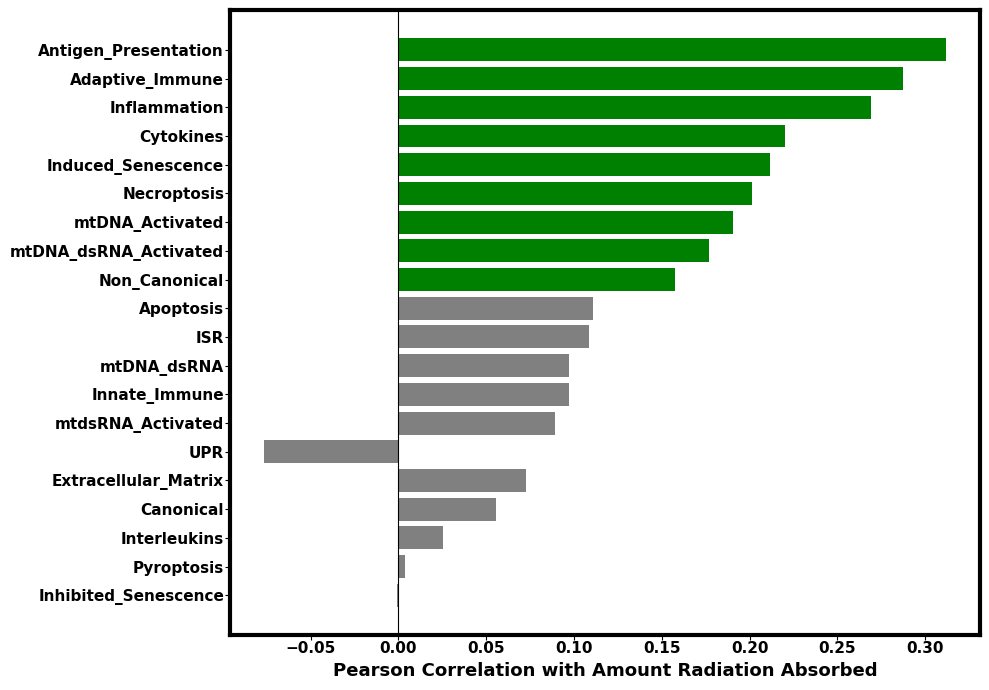

In [20]:
### Pearson correlation of Immunity and cell stress against the amount of amount of radiation absorbed
### Correlation for all samples

ref_col_name = df.columns[2]  # Column 3 - amount of radiation absorbed (mGy_Absorbed)
target_cols = df.columns[37:57] # Columns 38 to 57

results = []

# Step 1: Pearson correlations
for col in target_cols:
    x = df[ref_col_name]
    y = df[col]

    valid = x.notna() & y.notna()
    x_valid = x[valid]
    y_valid = y[valid]

    if len(x_valid) >= 2:
        r, p = pearsonr(x_valid, y_valid)
        results.append({'column': col, 'correlation': r, 'p_value': p})
    else:
        results.append({'column': col, 'correlation': None, 'p_value': None})

results_df = pd.DataFrame(results)

# Step 2: Adjust p-values (Bonferroni correction)
results_df = results_df.dropna(subset=['p_value'])
adjusted = multipletests(results_df['p_value'], method='bonferroni')
results_df['p_value_adj'] = adjusted[1]
results_df['significant'] = adjusted[0]

# Step 3: Sort by absolute correlation
results_df['abs_corr'] = results_df['correlation'].abs()
results_df_sorted = results_df.sort_values(by='abs_corr', ascending=False)

# Step 4: Filter only significant results
significant_results = results_df_sorted[results_df_sorted['significant']]


# Step 4: Plot top N correlations
top_n = 20
top_results = results_df_sorted.head(top_n)

# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(top_results['column'], top_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])
# bars = ax.barh(significant_results['column'], significant_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])
plt.xlabel("Pearson Correlation with Amount Radiation Absorbed", fontsize = 13.0)

plt.axvline(x=0, color='black', linewidth=0.8)
plt.tick_params(labelsize=11, pad=1)

ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
# plt.savefig('Correlation_Immunity_vs_Radiation_AllSample.svg',format='svg', dpi=600, transparent=False)
# plt.savefig('Correlation_Immunity_vs_Radiation_AllSample_sig.svg',format='svg', dpi=600, transparent=False)
plt.show()


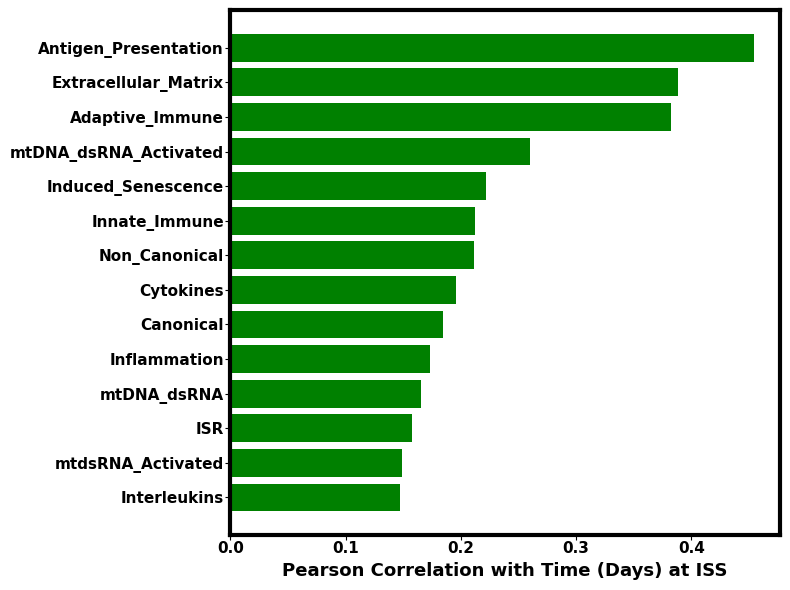

In [23]:
### Pearson correlation of Immunity/cell stress processes against the number of days at ISS
### Correlation for all samples

ref_col_name = df.columns[3]  # Column 4 - Days in ISS
target_cols = df.columns[37:57] # Columns 22 to 37

results = []

# Step 1: Pearson correlations
for col in target_cols:
    x = df[ref_col_name]
    y = df[col]

    valid = x.notna() & y.notna()
    x_valid = x[valid]
    y_valid = y[valid]

    if len(x_valid) >= 2:
        r, p = pearsonr(x_valid, y_valid)
        results.append({'column': col, 'correlation': r, 'p_value': p})
    else:
        results.append({'column': col, 'correlation': None, 'p_value': None})

results_df = pd.DataFrame(results)

# Step 2: Adjust p-values (Bonferroni correction)
results_df = results_df.dropna(subset=['p_value'])
adjusted = multipletests(results_df['p_value'], method='bonferroni')
results_df['p_value_adj'] = adjusted[1]
results_df['significant'] = adjusted[0]

# Step 3: Sort by absolute correlation
results_df['abs_corr'] = results_df['correlation'].abs()
results_df_sorted = results_df.sort_values(by='abs_corr', ascending=False)

significant_results = results_df_sorted[results_df_sorted['significant']]

# Step 4: Plot top N correlations
top_n = 20
top_results = results_df_sorted.head(top_n)

# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(8, 6))
# bars = ax.barh(top_results['column'], top_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])
bars = ax.barh(significant_results['column'], significant_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])

plt.xlabel("Pearson Correlation with Time (Days) at ISS", fontsize = 13.0)

plt.axvline(x=0, color='black', linewidth=0.8)
plt.tick_params(labelsize=11, pad=1)

ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
# plt.savefig('Correlation_Immunity_vs_ISS_AllSample.svg',format='svg', dpi=600, transparent=False)
plt.savefig('Correlation_Immunity_vs_ISS_AllSample_sig.svg',format='svg', dpi=600, transparent=False)
plt.show()


### In-flight Sample

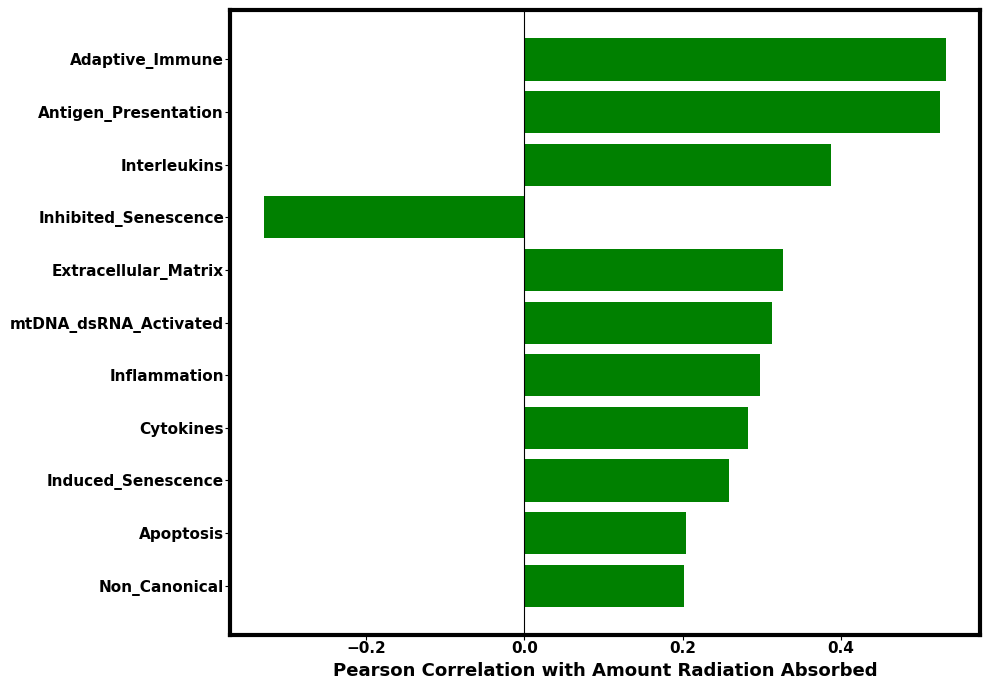

In [27]:
### Pearson correlation of Immunity and cell stress against the amount of amount of radiation absorbed
### Correlation for all samples

ref_col_name = di.columns[2]  # Column 3 - amount of radiation absorbed (mGy_Absorbed)
target_cols = di.columns[37:57] # Columns 38 to 57

results = []

# Step 1: Pearson correlations
for col in target_cols:
    x = di[ref_col_name]
    y = di[col]

    valid = x.notna() & y.notna()
    x_valid = x[valid]
    y_valid = y[valid]

    if len(x_valid) >= 2:
        r, p = pearsonr(x_valid, y_valid)
        results.append({'column': col, 'correlation': r, 'p_value': p})
    else:
        results.append({'column': col, 'correlation': None, 'p_value': None})

results_df = pd.DataFrame(results)

# Step 2: Adjust p-values (Bonferroni correction)
results_df = results_df.dropna(subset=['p_value'])
adjusted = multipletests(results_df['p_value'], method='bonferroni')
results_df['p_value_adj'] = adjusted[1]
results_df['significant'] = adjusted[0]

# Step 3: Sort by absolute correlation
results_df['abs_corr'] = results_df['correlation'].abs()
results_df_sorted = results_df.sort_values(by='abs_corr', ascending=False)

# Step 4: Filter only significant results
significant_results = results_df_sorted[results_df_sorted['significant']]


# Step 4: Plot top N correlations
top_n = 20
top_results = results_df_sorted.head(top_n)

# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 7))
# bars = ax.barh(top_results['column'], top_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])
bars = ax.barh(significant_results['column'], significant_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])
plt.xlabel("Pearson Correlation with Amount Radiation Absorbed", fontsize = 13.0)

plt.axvline(x=0, color='black', linewidth=0.8)
plt.tick_params(labelsize=11, pad=1)

ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
# plt.savefig('Correlation_Immunity_vs_Radiation_Inflight.svg',format='svg', dpi=600, transparent=False)
plt.savefig('Correlation_Immunity_vs_Radiation_Inflight_sig.svg',format='svg', dpi=600, transparent=False)
plt.show()


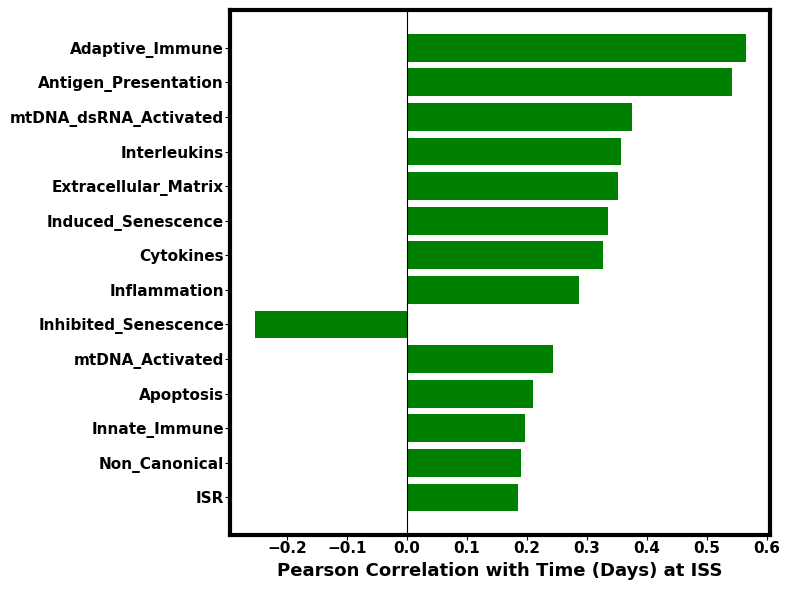

In [34]:
### Pearson correlation of Immunity/cell stress processes against the number of days at ISS
### Correlation for all samples

ref_col_name = di.columns[3]  # Column 4 - Days in ISS
target_cols = di.columns[37:57] # Columns 22 to 37

results = []

# Step 1: Pearson correlations
for col in target_cols:
    x = di[ref_col_name]
    y = di[col]

    valid = x.notna() & y.notna()
    x_valid = x[valid]
    y_valid = y[valid]

    if len(x_valid) >= 2:
        r, p = pearsonr(x_valid, y_valid)
        results.append({'column': col, 'correlation': r, 'p_value': p})
    else:
        results.append({'column': col, 'correlation': None, 'p_value': None})

results_df = pd.DataFrame(results)

# Step 2: Adjust p-values (Bonferroni correction)
results_df = results_df.dropna(subset=['p_value'])
adjusted = multipletests(results_df['p_value'], method='bonferroni')
results_df['p_value_adj'] = adjusted[1]
results_df['significant'] = adjusted[0]

# Step 3: Sort by absolute correlation
results_df['abs_corr'] = results_df['correlation'].abs()
results_df_sorted = results_df.sort_values(by='abs_corr', ascending=False)

significant_results = results_df_sorted[results_df_sorted['significant']]

# Step 4: Plot top N correlations
top_n = 20
top_results = results_df_sorted.head(top_n)

# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(8, 6))
# bars = ax.barh(top_results['column'], top_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])
bars = ax.barh(significant_results['column'], significant_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])

plt.xlabel("Pearson Correlation with Time (Days) at ISS", fontsize = 13.0)

plt.axvline(x=0, color='black', linewidth=0.8)
plt.tick_params(labelsize=11, pad=1)

ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
# plt.savefig('Correlation_Immunity_vs_ISS_Inflight.svg',format='svg', dpi=600, transparent=False)
plt.savefig('Correlation_Immunity_vs_ISS_Inflight_sig.svg',format='svg', dpi=600, transparent=False)
plt.show()


### Post-flight

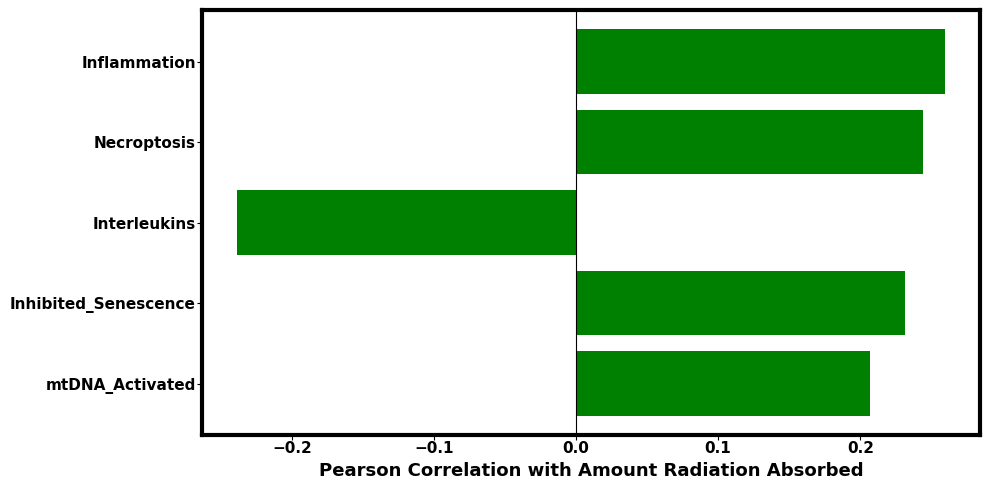

In [41]:
### Pearson correlation of Immunity and cell stress against the amount of amount of radiation absorbed
### Correlation for all samples

ref_col_name = dp.columns[2]  # Column 3 - amount of radiation absorbed (mGy_Absorbed)
target_cols = dp.columns[37:57] # Columns 38 to 57

results = []

# Step 1: Pearson correlations
for col in target_cols:
    x = dp[ref_col_name]
    y = dp[col]

    valid = x.notna() & y.notna()
    x_valid = x[valid]
    y_valid = y[valid]

    if len(x_valid) >= 2:
        r, p = pearsonr(x_valid, y_valid)
        results.append({'column': col, 'correlation': r, 'p_value': p})
    else:
        results.append({'column': col, 'correlation': None, 'p_value': None})

results_df = pd.DataFrame(results)

# Step 2: Adjust p-values (Bonferroni correction)
results_df = results_df.dropna(subset=['p_value'])
adjusted = multipletests(results_df['p_value'], method='bonferroni')
results_df['p_value_adj'] = adjusted[1]
results_df['significant'] = adjusted[0]

# Step 3: Sort by absolute correlation
results_df['abs_corr'] = results_df['correlation'].abs()
results_df_sorted = results_df.sort_values(by='abs_corr', ascending=False)

# Step 4: Filter only significant results
significant_results = results_df_sorted[results_df_sorted['significant']]


# Step 4: Plot top N correlations
top_n = 20
top_results = results_df_sorted.head(top_n)

# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 5))
# bars = ax.barh(top_results['column'], top_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])
bars = ax.barh(significant_results['column'], significant_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])
plt.xlabel("Pearson Correlation with Amount Radiation Absorbed", fontsize = 13.0)

plt.axvline(x=0, color='black', linewidth=0.8)
plt.tick_params(labelsize=11, pad=1)

ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
# plt.savefig('Correlation_Immunity_vs_Radiation_Postflight.svg',format='svg', dpi=600, transparent=False)
plt.savefig('Correlation_Immunity_vs_Radiation_Postflight_sig.svg',format='svg', dpi=600, transparent=False)
plt.show()


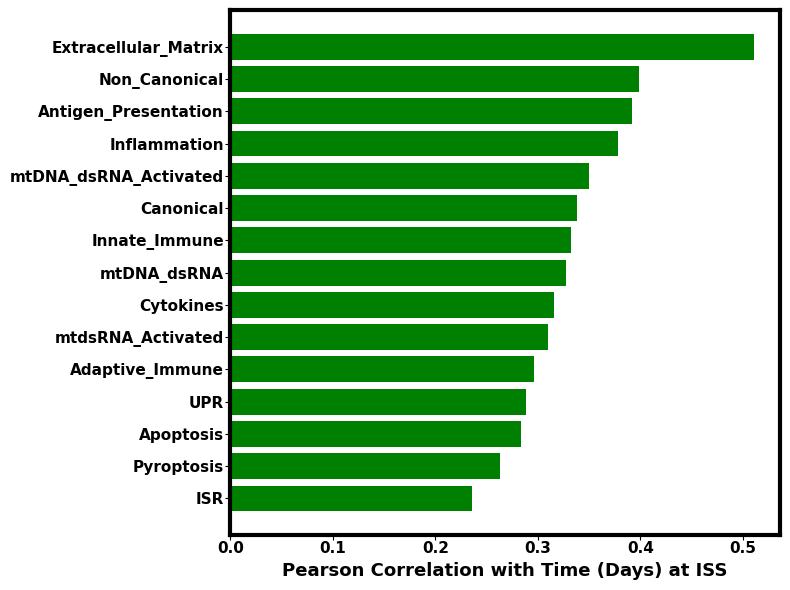

In [45]:
### Pearson correlation of Immunity/cell stress processes against the number of days at ISS
### Correlation for all samples

ref_col_name = dp.columns[3]  # Column 4 - Days in ISS
target_cols = dp.columns[37:57] # Columns 22 to 37

results = []

# Step 1: Pearson correlations
for col in target_cols:
    x = dp[ref_col_name]
    y = dp[col]

    valid = x.notna() & y.notna()
    x_valid = x[valid]
    y_valid = y[valid]

    if len(x_valid) >= 2:
        r, p = pearsonr(x_valid, y_valid)
        results.append({'column': col, 'correlation': r, 'p_value': p})
    else:
        results.append({'column': col, 'correlation': None, 'p_value': None})

results_df = pd.DataFrame(results)

# Step 2: Adjust p-values (Bonferroni correction)
results_df = results_df.dropna(subset=['p_value'])
adjusted = multipletests(results_df['p_value'], method='bonferroni')
results_df['p_value_adj'] = adjusted[1]
results_df['significant'] = adjusted[0]

# Step 3: Sort by absolute correlation
results_df['abs_corr'] = results_df['correlation'].abs()
results_df_sorted = results_df.sort_values(by='abs_corr', ascending=False)

significant_results = results_df_sorted[results_df_sorted['significant']]

# Step 4: Plot top N correlations
top_n = 20
top_results = results_df_sorted.head(top_n)

# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(8, 6))
# bars = ax.barh(top_results['column'], top_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])
bars = ax.barh(significant_results['column'], significant_results['correlation'], color=['green' if s else 'gray' for s in top_results['significant']])

plt.xlabel("Pearson Correlation with Time (Days) at ISS", fontsize = 13.0)

plt.axvline(x=0, color='black', linewidth=0.8)
plt.tick_params(labelsize=11, pad=1)

ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
# plt.savefig('Correlation_Immunity_vs_ISS_Postflight.svg',format='svg', dpi=600, transparent=False)
plt.savefig('Correlation_Immunity_vs_ISS_Postflight_sig.svg',format='svg', dpi=600, transparent=False)
plt.show()
